**Learn note for `GALFIT`**  

复制`galfit-example`里的`EXAMPLE`文件到此程序所在目录，重命名为`test`  
在test里面做练习，此程序辅助分析  
@time: 2022.07.07  
@[GALFIT web](https://users.obs.carnegiescience.edu/peng/work/galfit/galfit.html)


In [12]:
from astropy.io import fits
import os
import matplotlib.pyplot as plt

# ^ 禁用同一单元格内的输出覆盖
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 官方提供的测试例子
PATH_example = "/Users/rui/Code/1_Astronotes/11_GALFIT/example"

# a source in COSMOS
PATH_test = "/Users/rui/Code/1_Astronotes/11_GALFIT/test"

# Example

## Input files  
1. gal.fits
2. galfit.feedme
3. psf.fits

输入图像的性质

In [2]:
# 输入图像
PATH = os.path.join(PATH_example, 'gal.fits')

hdul = fits.open(PATH)
hdul.info()

image = fits.getdata(PATH)
print(type(image))
print(image.shape)

Filename: /Users/rui/Code/1_Astronotes/11_GALFIT/example/gal.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     395   (93, 93)   float32   
<class 'numpy.ndarray'>
(93, 93)


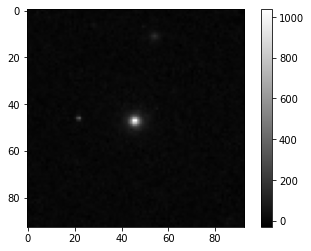

In [3]:
plt.imshow(image, cmap='gray')
plt.colorbar()

psf性质

In [4]:
PATH = os.path.join(PATH_example, 'psf.fits')

hdul = fits.open(PATH)
hdul.info()

image = fits.getdata(PATH)
print(type(image))
print(image.shape)
hdul[0].header

Filename: /Users/rui/Code/1_Astronotes/11_GALFIT/example/psf.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     179   (51, 51)   float32   
<class 'numpy.ndarray'>
(51, 51)


SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                   51 / Axis length                                    
NAXIS2  =                   51 / Axis length                                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 1999' / FITS file originator        
EXTEND  =                    F / File may contain extensions                    
IRAF-TLM= '13:40:45 (10/09/2002)' / Time of last modification                   
OBJECT  = 'PSF evaluated at X: 255.50 Y: 255.50 Mag: 19.140'                    
IRAF    = 'NOAO/IRAFV2.11EXPORT'                                                
HOST    = 'spiff.as.arizona.edu'                                                
USER    = 'cyp     '                                                            
DATE    = '2002-09-10T20:40:

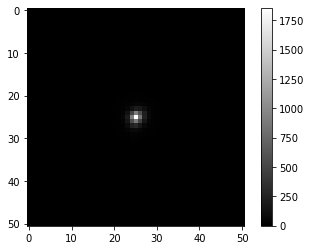

In [5]:
plt.imshow(image, cmap='gray')
plt.colorbar()

## Output files

`imgblock.fits`: 输出图像的FITS cube

In [6]:
PATH = os.path.join(PATH_example, 'imgblock.fits')

hdul = fits.open(PATH)
hdul.info()

Filename: /Users/rui/Code/1_Astronotes/11_GALFIT/example/imgblock.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (93, 93)   float32   
  1                1 ImageHDU       391   (93, 93)   float32   
  2                1 ImageHDU        43   (93, 93)   float32   
  3                1 ImageHDU         6   (93, 93)   float32   


In [7]:
# 拟合结果在第2层的header里
hdul[2].header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                   93 / Length of data axis 1                          
NAXIS2  =                   93 / Length of data axis 2                          
OBJECT  = 'model   '           / Component type                                 
COMMENT ========== GALFIT Input Parameters ==========                           
INITFILE= 'galfit.feedme'      / GALFIT input file                              
DATAIN  = 'gal.fits'           / Input data image                               
SIGMA   = 'none    '           / Input sigma image                              
PSF     = 'psf.fits '          / Convolution PSF and kernel                     
CONSTRNT= 'none    '           / Parameter constraint file                      
MASK    = 'none    '        

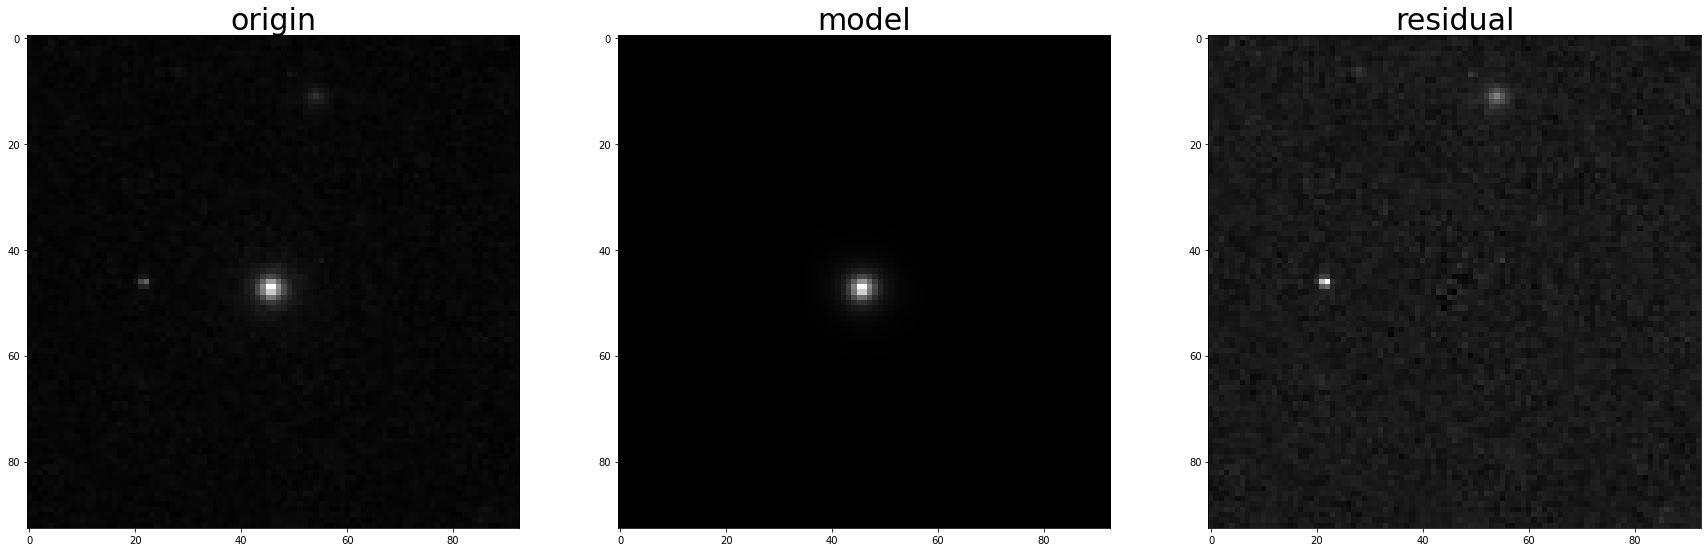

In [8]:
image1 = hdul[1].data
image2 = hdul[2].data
image3 = hdul[3].data

fig, ax = plt.subplots(1, 3, figsize=(30, 10))

ax[0].set_title('origin', fontsize=30)
ax[0].imshow(image1, cmap='gray');

ax[1].set_title('model', fontsize=30)
ax[1].imshow(image2, cmap='gray');

ax[2].set_title('residual', fontsize=30)
ax[2].imshow(image3, cmap='gray');


# my source

查看原始图像

Filename: /Users/rui/Code/1_Astronotes/11_GALFIT/my source/cosmos_15302.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    4142   (100, 100)   float32   


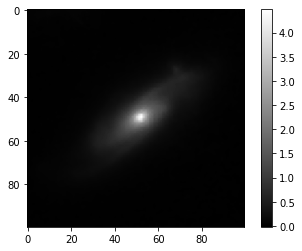

In [11]:
hdul = fits.open(os.path.join(PATH_test, "cosmos_15302.fits"))
data = hdul[0].data
header = hdul[0].header
hdul.info()

plt.imshow(data, cmap='gray');
plt.colorbar();

结果

In [36]:
hdul = fits.open("./my source/imgblock.fits")
hdul.info()

Filename: ./my source/imgblock.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (90, 90)   float32   
  1                1 ImageHDU      4144   (90, 90)   float32   
  2                1 ImageHDU        43   (90, 90)   float32   
  3                1 ImageHDU         6   (90, 90)   float32   


In [37]:
hdul[2].header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                   90 / Length of data axis 1                          
NAXIS2  =                   90 / Length of data axis 2                          
OBJECT  = 'model   '           / Component type                                 
COMMENT ========== GALFIT Input Parameters ==========                           
INITFILE= 'galfit.feedme'      / GALFIT input file                              
DATAIN  = 'cosmos_5265.fits'   / Input data image                               
SIGMA   = 'none    '           / Input sigma image                              
PSF     = 'gauss_4.0_7x7.conv ' / Convolution PSF and kernel                    
CONSTRNT= 'none    '           / Parameter constraint file                      
MASK    = 'none    '        

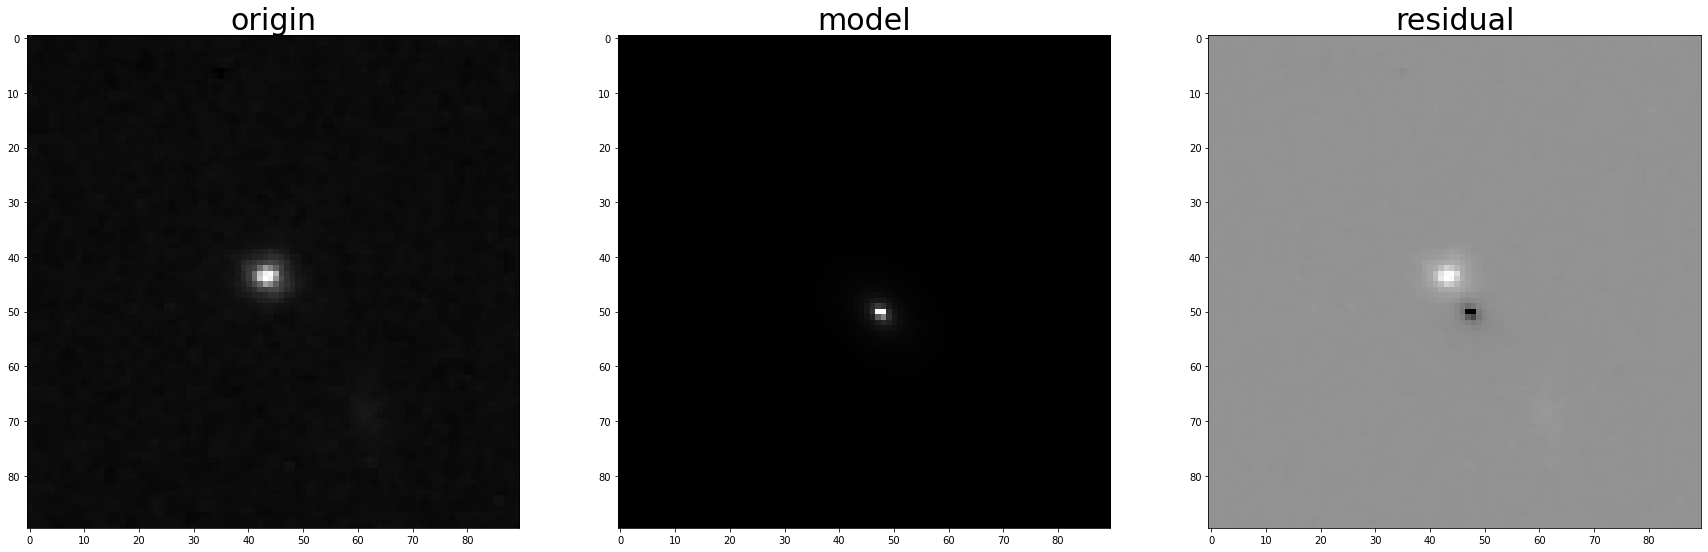

In [38]:
image1 = hdul[1].data
image2 = hdul[2].data
image3 = hdul[3].data

fig, ax = plt.subplots(1, 3, figsize=(30, 10))

ax[0].set_title('origin', fontsize=30)
ax[0].imshow(image1, cmap='gray');

ax[1].set_title('model', fontsize=30)
ax[1].imshow(image2, cmap='gray');

ax[2].set_title('residual', fontsize=30)
ax[2].imshow(image3, cmap='gray');